# Cuestiones previas

**Pregunta 1.** Si una función es periódica ¿Puede estar bien interpolada por un polinomio de
Hermite?

Interpolar función periodica por polinomios mal. Polinomios tienen un numero finito de derivadas, entonces al final siempre crecen o decrecen en el limite.

**Pregunta 2.** En qué condiciones pensáis que un polinomio de Hermite puede interpolar bien una
función periódica.

Intervalo acotado.

**Pregunta 3.** ¿Qué método pensáis que podría ser mejor para implementar funciones periódicas?

Base de funciones periódicas.

# Ejercicios

Hasta ahora hemos empleados polinomios para aproximar funciones, sin embargo, existen
otras bases de funciones que no son polinomios, por ejemplo, la función exponencial compleja $g(x) = e^{-2\pi ihx}$
, que, por la fórmula de Euler ($e^{it} = cos(t) + i sen(t))$ es una función periódica, siendo $h$ la frecuencia. 

Quisiéramos, por tanto, expresar una función $f$ como $f(x) = \sum_{k=-\infty}^{\infty} c_k e^{-2\pi ih_kx}$
, es posible demostrar que
$$
c_k = \int_{-\infty}^{\infty} f(x) e^{2\pi h_k x} dx
$$

## Apartado 1

Considerar la función $f(x) = cos^2(x)-sin(x)$. ¿Es $f$ una función periódica?
Considerad ahora los valores de $x$, $x=i\times(π/32), i=0, \dots, 640$ dibujad la función para esos valores
de x.

In [153]:
import numpy as np
import matplotlib.pyplot as plt
n_puntos = 640
f = lambda x: np.cos(x)**2 - np.sin(x)
i = np.arange(n_puntos)

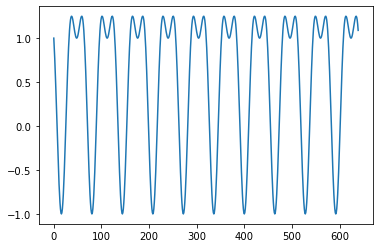

In [154]:
plt.plot(i, f(i*np.pi/32))
plt.show()

La función $f$ es periodica ya que $f(x + 2\pi) = f(x)$.

## Apartado 2

Implementad una función `coefs(f,x)` que calcule los coeficientes $c_n, n = 0, \dots, 640$
usando sumas de Riemann y tomando como valores de $h_k = \frac{32n}{640\pi}.

Es decir,
$$
c_n = \frac{\pi}{32} \sum_{k = 0}^{639} f(x_k) e^{2\pi i\frac{32n}{640\pi}x_k} = \frac{\pi}{32} \sum_{k = 0}^{639} f(x_k) e^{i\frac{n}{10}x_k} \ n = 0,\dots,639.
$$

In [185]:
g = lambda x,n: np.exp(1j*n/10*x)
def coefs(f, x):
    matrix = np.array([[g(a,n) for a in x ] 
                                for n in range(len(x))])
    return np.pi/32 * matrix@f(x)

c = coefs(f, i*np.pi/32)

Pintad una gráfica con el módulo de los coeficientes (ya que pueden ser valores complejos).

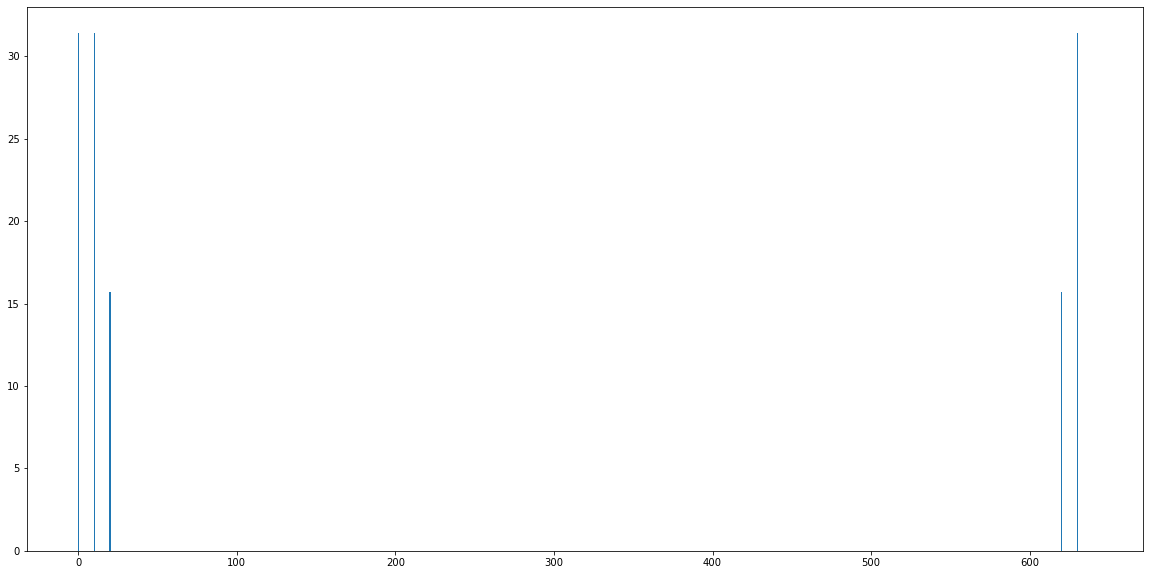

In [186]:
plt.figure(figsize=(20,10))
plt.bar(i, np.abs(c))
plt.show()

## Apartado 3

Implementad una función `eval(coefs,x)` que implemente la fórmula de
aproximación mediante funciones periódicas.

$$
f(x) = \frac{1}{640} \sum_{n=0}^{640} c_n e^{-2\pi i\frac{23n}{640\pi}x} = \frac{1}{640} \sum_{n=0}^{640} c_n e^{-i\frac{n}{10}x}
$$

In [187]:
def eval(coefs, x):
    return (32/np.pi) * (1/(len(coefs))) *coefs@np.array([g(x,n)**(-1) for n in range(len(coefs))])

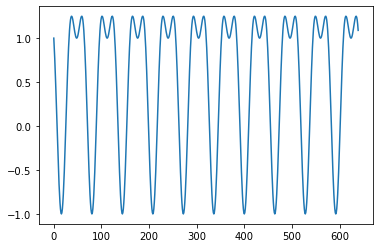

In [190]:
plt.plot(i, np.real(eval(c, i*np.pi/32)))
plt.show()

Calcular el valor aproximado en los puntos, $x=2,5 x=0, x=.01, x=.1, x=\pi$ y calcular el error
absoluto en esos puntos. Por los datos obtenidos ¿Estamos ante un método de interpolación o
de regresión?

In [163]:
xs = [2.5, 0, .01, .1, np.pi]
for x in xs:
    print(np.abs(f(x)-eval(c,x)))

1.3512763876751575
1.4584765018798652e-13
0.35310006519547826
0.06782044086177164
7.205435169489937e-14


Es una interpotlacion porque por los nodos 0, pi coinciden

# Preguntas y ejercicios opcionales

## Apartado 2

Para calcular el valor de la integral anterior hemos usado sumas de Riemann, Probad a
calcular la integral anterior mediante métodos un poco mejores, como, por ejemplo, la
regla de trapecio, o incluso un método de Gauss. ¿Obtenéis mejores aproximaciones?

In [199]:
h = lambda x,k: f(x)*np.exp(2*np.pi*1j*32*k/640/np.pi*x)
x = i*np.pi/32
coefs_trapz = np.array([np.trapz(h(x,k), x) for k in range(n_puntos)])

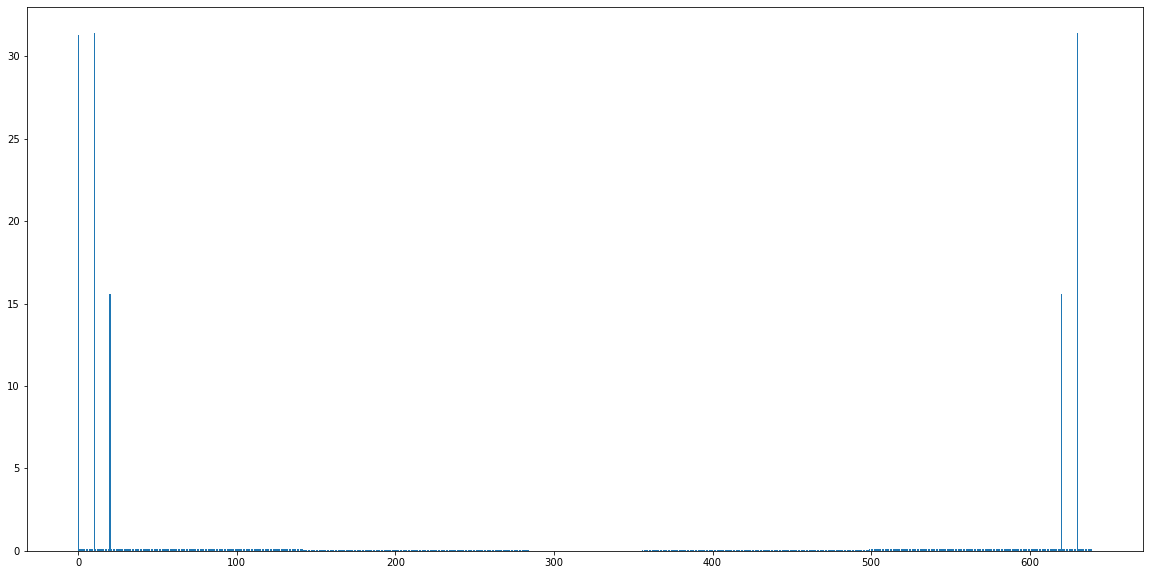

In [200]:
plt.figure(figsize=(20,10))
plt.bar(i, np.abs(coefs_trapz))
plt.show()

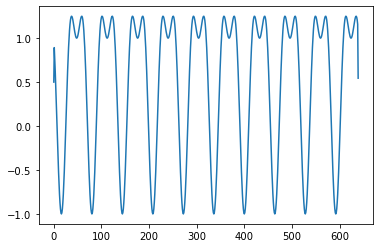

In [201]:
plt.plot(i, np.real(eval(coefs_trapz, i*np.pi/32)))
plt.show()

In [202]:
xs = [2.5, 0, .01, .1, np.pi]
for x in xs:
    print(np.abs(f(x)-eval(coefs_trapz,x)))

1.362657530329912
0.49999999999984124
0.2715794578419658
0.05475697740604419
1.3635845151630405e-13
